# Exploratory Data Analysis

In [1]:
# importing libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing
warnings.filterwarnings("ignore")

# adding scripts to path
sys.path.append(os.path.abspath("../scripts/python"))

In [2]:
# loading scripts
from connection_manager import Manager
from modeling_utils import Modeling_Utils
man = Manager()
util = Modeling_Utils()

In [3]:
# establishing connection

connection, cursor = man.connect_to_server(host="localhost", port=5432, user="warehouse", password="warehouse", dbName="warehouse")

successfully connected; cursor: <cursor object at 0x7f8fad8add60; closed: 0>


In [4]:
# fetching data
data = man.fetch_data(conn=connection, limit=1000000)
data.head(5)

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost,design_feature,feature_type,feature_variety,sub_feature,feature_value
0,b3sw44m,impression,480,480,1b2w4wp0,626fb0947a634114a57aa5d0a7611833,2021-01-15 11:26:44,adunit-audi-e-tron-and-e-tron-sportback-mob/8a...,Singapore,penang.chinapress.com.my,...,64826.0,31764.74,Percentage,15.0,27000.03,None,None,None,None,None
1,b3sw44m,impression,480,480,1b2w4wp0,3e89798fb42149c1ac5bfbc0b9d5495a,2021-01-15 11:26:45,adunit-audi-e-tron-and-e-tron-sportback-mob/8a...,Singapore,www.koreaboo.com,...,64826.0,31764.74,Percentage,15.0,27000.03,None,None,None,None,None
2,b3sw44m,impression,480,480,1b2w4wp0,d5409e6c570a4089b1e0751d504c5ea8,2021-01-15 11:26:45,adunit-audi-e-tron-and-e-tron-sportback-mob/8a...,Singapore,assets.eenadu.net,...,64826.0,31764.74,Percentage,15.0,27000.03,None,None,None,None,None
3,b3sw44m,impression,480,480,1b2w4wp0,cf99974668c84952948aaae0c4ea0047,2021-01-15 11:27:14,adunit-audi-e-tron-and-e-tron-sportback-mob/8a...,Singapore,pandagossips.com,...,64826.0,31764.74,Percentage,15.0,27000.03,None,None,None,None,None
4,b3sw44m,impression,480,480,1b2w4wp0,2c81fc4d3c534770976eb0ba512384de,2021-01-15 11:27:20,adunit-audi-e-tron-and-e-tron-sportback-mob/8a...,Singapore,mustsharenews.com,...,64826.0,31764.74,Percentage,15.0,27000.03,None,None,None,None,None


In [5]:
# checking data
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")
util.summ_columns(data)

 There are 360663 rows and 36 columns


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,campaign_id,0,0.0,object,63
1,types,0,0.0,object,3
2,width,2,0.0,object,6
3,height,2,0.0,object,6
4,creative_id,0,0.0,object,466
5,auction_id,0,0.0,object,354930
6,browser_ts,0,0.0,datetime64[ns],269964
7,game_key,0,0.0,object,228
8,geo_country,3,0.0,object,19
9,site_name,0,0.0,object,12185


### Observation
- There are 27 Categorical variables and 8 numerical variables
- There are some columns with more than 98% of the data missing. 
   These columns will be removed during modeling
- for the others we will fill missing values with mean value

#

## Univariate Analysis

In [6]:
# numerical variables summary
data.describe()

,buy_rate_cpe,volume_agreed,gross_cost_or_budget,percentages
count,351302.000000,3.513020e+05,3.515590e+05,335153.000000
mean,2.385897,1.894372e+05,8.219068e+04,7.101190
std,5.500968,4.653039e+05,1.453028e+05,7.489032
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.330000,1.000000e+04,2.541168e+04,0.000000
50%,0.400000,1.250000e+05,5.000000e+04,0.000000
75%,0.490000,2.142857e+05,9.999990e+04,15.000000
max,28.000000,5.963333e+06,1.789000e+06,15.000000


## Observation
- The median volume agreed is 125,000 and the maximum value is 596,333
- The Maximum gross cost budget is around 1.8 Million

In [7]:
# aggregating some of the categorical variables

type_agr1 = util.find_agg(data, ["types"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
brow_agr1 = util.find_agg(data, ["browser"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
devi_agr1 = util.find_agg(data, ["device_type"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
serve_agr1 = util.find_agg(data, ["serving_location"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
geo_agr1 = util.find_agg(data, ["geo_country"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
place_agr1 = util.find_agg(data, ["placement"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
kpis = util.find_agg(data, ["kpis"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
cost_agr1 = util.find_agg(data, ["cost_centre"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)

                 types  counts
2           impression  336600
1        first_dropped   19658
0  click-through-event    4405


<AxesSubplot:xlabel='types'>

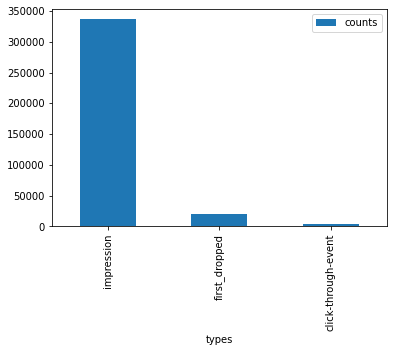

In [8]:
# types distribution
print(type_agr1)
type_agr1.plot.bar(x="types")

### Observation
- Impression is significantly higher than the other types
- click-through is the least common occerance, Which means most of the advertisements don't result in a sell.

                       browser  counts
6                Chrome Mobile  125245
19               Mobile Safari   60238
7        Chrome Mobile WebView   45342
20  Mobile Safari UI/WKWebView   36676
12                    Facebook   36421


<AxesSubplot:xlabel='browser'>

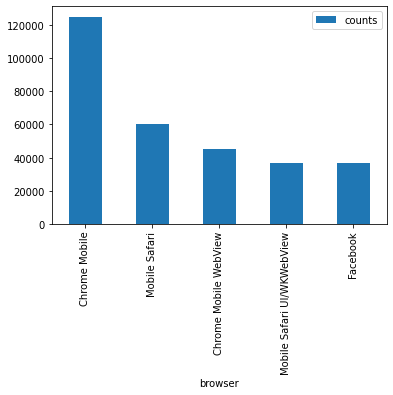

In [9]:
# browser distribution
print(brow_agr1)
brow_agr1.plot.bar(x="browser")

### Observations
- The most used type of browsers are chrome browser and safari browser variations

                                           placement  counts
0         320x480 (Fullscreen mobile / interstitial)  270476
1  320x480 (Fullscreen mobile / interstitial)\n30...   71709
3                                           Pre-roll   16149
2  320x480 (Fullscreen mobile / interstitial)\n30...    2329


<AxesSubplot:xlabel='placement'>

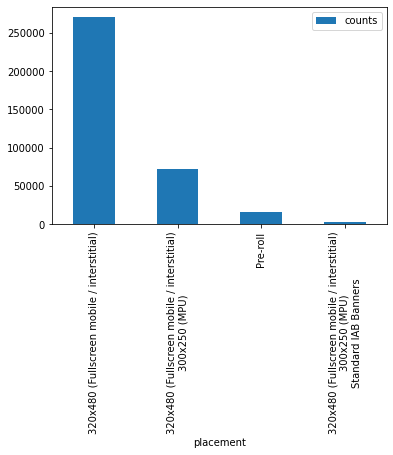

In [10]:
# placement distributions
print(place_agr1)
place_agr1.plot.bar(x="placement")

                        kpis  counts
4       CTR\nEngagement Rate  182410
6            Engagement Rate   69400
8  VTR\nCTR\nEngagement Rate   54039
5            Conversion Rate   19454
2       CTR\nConversion Rate   18254


<AxesSubplot:xlabel='kpis'>

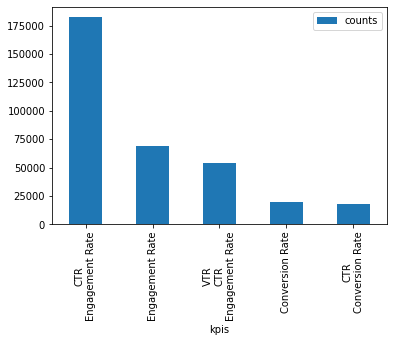

In [11]:
# browser distribution
print(kpis)
kpis.plot.bar(x="kpis")

## Bivariate Analysis

In [12]:
# relationship between types and browser

pd.crosstab(data["types"], data["browser"], normalize="index")

browser,Amazon Silk,Android,Apple Mail,BacaBerita App,BrandVeritySpider,Chrome,Chrome Mobile,Chrome Mobile WebView,Chrome Mobile iOS,Crosswalk,...,Opera Coast,Opera Mobile,Other,Pinterest,Puffin,QQ Browser Mobile,Safari,Samsung Internet,UC Browser,Yandex Browser
types,,,,,,,,,,,,,,,,,,,,,
click-through-event,0.000681,0.000227,0.000227,0.000000,0.000000,0.034506,0.367310,0.105562,0.019296,0.000000,...,0.000000,0.000454,0.000000,0.030420,0.00000,0.000227,0.000454,0.032236,0.000227,0.000000
first_dropped,0.001425,0.000000,0.000102,0.000000,0.000000,0.021317,0.398555,0.140822,0.011498,0.000000,...,0.000000,0.000661,0.000305,0.019994,0.00000,0.000000,0.000407,0.042684,0.000051,0.000000
impression,0.014656,0.000006,0.000187,0.000359,0.000012,0.046026,0.344012,0.125102,0.017086,0.000021,...,0.000006,0.000936,0.000110,0.031682,0.00008,0.000018,0.001485,0.046649,0.000086,0.000012


### Observations
- As can be seen from the above table, chrome mobile has the largest percentage for all three categories.

In [13]:
# relationship between types and placement

pd.crosstab(data["types"], data["placement"], normalize="index")

placement,320x480 (Fullscreen mobile / interstitial),320x480 (Fullscreen mobile / interstitial)\n300x250 (MPU),320x480 (Fullscreen mobile / interstitial)\n300x250 (MPU)\nStandard IAB Banners,Pre-roll
types,,,,
click-through-event,0.790238,0.147333,0.000000,0.062429
first_dropped,0.787974,0.155967,0.000000,0.056059
impression,0.747193,0.202002,0.006919,0.043886


### Observation
- It is evident that 320x480 (Fullscreen mobile / interstitial) has the highest click-through and other events.

In [14]:
# checking correlations
df, le = util.labeler(data)
corr = df.corr()

successfully labeled


In [15]:
corr.style.background_gradient(cmap='coolwarm')

,campaign_id,types,width,height,creative_id,auction_id,game_key,geo_country,site_name,platform_os,device_type,browser,campaign_name,submission_date,descriptions,campaign_objectives,kpis,placement,startdate,enddate,serving_location,black_white_audience,cost_centre,currency,buy_rate_cpe,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost,design_feature,feature_type,feature_variety,sub_feature,feature_value
campaign_id,1.000000,0.009139,0.052107,0.052107,0.026876,0.003267,-0.103581,-0.098884,-0.029971,-0.004678,0.072318,-0.089235,0.000168,0.012236,-0.096498,0.004461,-0.014786,-0.198429,0.040035,0.073174,-0.097336,-0.069761,0.017215,0.115138,0.352392,-0.078814,0.020993,0.172969,-0.084913,0.009983,-0.038587,-0.035935,0.036432,-0.035794,0.038383
types,0.009139,1.000000,-0.027098,-0.027098,-0.019025,-0.000424,0.013436,-0.015701,-0.025017,-0.043241,0.069546,0.019366,0.012408,0.044099,-0.002139,0.031067,0.021793,0.006640,0.053689,0.051358,0.005425,-0.025519,-0.012086,-0.021796,-0.014203,0.000985,-0.013281,0.009877,-0.040156,0.064102,0.021161,0.019663,-0.019673,0.019042,-0.018165
width,0.052107,-0.027098,1.000000,1.000000,-0.078435,-0.001786,0.120228,-0.394605,-0.100376,0.084711,-0.157941,-0.026125,0.286563,0.134868,0.129621,0.428974,0.065619,0.337875,0.365739,0.347220,-0.186138,-0.009370,-0.352515,-0.339343,0.024158,-0.212684,-0.208484,-0.311935,0.131154,0.138045,-0.220275,-0.202120,0.206100,-0.200266,0.186078
height,0.052107,-0.027098,1.000000,1.000000,-0.078435,-0.001786,0.120228,-0.394605,-0.100376,0.084711,-0.157941,-0.026125,0.286563,0.134868,0.129621,0.428974,0.065619,0.337875,0.365739,0.347220,-0.186138,-0.009370,-0.352515,-0.339343,0.024158,-0.212684,-0.208484,-0.311935,0.131154,0.138045,-0.220275,-0.202120,0.206100,-0.200266,0.186078
creative_id,0.026876,-0.019025,-0.078435,-0.078435,1.000000,-0.001123,0.024033,0.127918,-0.008935,-0.043332,0.047506,0.025182,0.181482,-0.160932,0.283038,0.003389,-0.097734,-0.012808,0.175464,0.171628,0.148626,0.233396,0.117673,-0.212090,-0.070370,-0.019120,-0.032515,0.032212,-0.134799,0.224040,-0.022877,-0.019146,0.021644,-0.021093,0.020725
auction_id,0.003267,-0.000424,-0.001786,-0.001786,-0.001123,1.000000,-0.001319,0.002354,0.001440,-0.001453,-0.003766,0.000684,-0.001256,-0.000005,-0.003996,0.005334,0.000049,0.003927,-0.001309,-0.000604,0.000999,0.001053,0.001132,0.001337,0.001186,-0.010082,-0.009073,0.001870,0.001773,0.001837,0.003848,0.003667,-0.003909,0.003828,-0.003968
game_key,-0.103581,0.013436,0.120228,0.120228,0.024033,-0.001319,1.000000,-0.041573,0.145366,-0.033560,-0.032422,0.033054,0.275675,0.236018,0.153448,0.242358,0.303875,0.345337,0.279864,0.241363,0.073181,-0.112868,-0.025689,-0.082527,-0.217235,0.037357,-0.042677,-0.345333,-0.143171,0.161142,-0.023082,-0.024221,0.020355,-0.019282,0.011525
geo_country,-0.098884,-0.015701,-0.394605,-0.394605,0.127918,0.002354,-0.041573,1.000000,-0.141168,-0.083429,0.132228,-0.020900,-0.426855,-0.250361,0.020617,-0.560756,0.055841,-0.298155,-0.169602,-0.130307,0.677913,0.466003,0.906098,0.359021,-0.165036,0.141478,0.073250,0.176943,-0.515714,-0.063847,0.040996,0.037616,-0.038954,0.037930,-0.035039
site_name,-0.029971,-0.025017,-0.100376,-0.100376,-0.008935,0.001440,0.145366,-0.141168,1.000000,-0.051483,0.010853,0.037145,0.028075,0.006784,0.088307,0.095962,0.153995,0.172359,-0.112860,-0.122453,-0.065693,-0.249161,-0.143495,0.174900,-0.082318,-0.031024,-0.060322,-0.118641,0.228086,-0.251006,-0.014298,-0.011928,0.013533,-0.013090,0.011519
platform_os,-0.004678,-0.043241,0.084711,0.084711,-0.043332,-0.001453,-0.033560,-0.083429,-0.051483,1.000000,-0.196742,-0.388434,-0.018983,0.079297,-0.081565,-0.201081,0.133552,-0.116230,-0.005960,-0.103254,-0.057175,-0.076168,-0.064604,-0.160760,0.104366,-0.091585,-0.058079,0.098005,0.066082,0.154446,-0.010232,-0.008951,0.009311,-0.008943,0.008560


In [17]:
# the list below holds highly correlated variables those above 60% correlation.
highly_correlated = ["height","cost_center", "serving_location", "campaign_objectives" ]

### Conclustion
- The majority of the click-through events and Engagement events take place on teh chrome mobile
- CTR Engagement is the most used KPI type.